# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd
import numpy as np

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/'+ "KaggleV2-May-2016.csv"

def load_medical_data(csv_file=CSV_FILE):
    # read data using read_csv function
    return  pd.read_csv(CSV_FILE,dtype={'PatientId':str})


In [2]:
raw_appdt_df = load_medical_data()
raw_appdt_df.shape

(110527, 14)

In [4]:
raw_appdt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [5]:
import datetime

def setNoShowFlag(noShowStr):
    flag = 1
    if noShowStr == 'No':
        flag=0
    return flag

clean_appdt_df = raw_appdt_df

#dropping cols with Age < 0
clean_appdt_df.drop(clean_appdt_df[clean_appdt_df['Age'] < 0].index,inplace=True)

#ensuring all PatientId's are ints; casting the type to int
if (clean_appdt_df.PatientId.dtype == object):
    #clean_appdt_df.drop(clean_appdt_df[clean_appdt_df['PatientId'].str.contains("E")].index,inplace=True)
    clean_appdt_df = clean_appdt_df[clean_appdt_df['PatientId'].str.isnumeric()]
    clean_appdt_df.PatientId = clean_appdt_df.PatientId.astype(np.int64)

#setting the types to datetime format
clean_appdt_df.ScheduledDay = pd.to_datetime(clean_appdt_df.ScheduledDay)    
clean_appdt_df.AppointmentDay = pd.to_datetime(clean_appdt_df.AppointmentDay)

clean_appdt_df.rename(columns={'No-show':'noShow'}, inplace=True)
clean_appdt_df['noShow_flag'] = clean_appdt_df.noShow.map(lambda x:setNoShowFlag(x))

clean_appdt_df.Neighbourhood = clean_appdt_df.Neighbourhood.str.encode('utf-8').str.decode('ascii', 'ignore')

clean_appdt_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'noShow',
       'noShow_flag'],
      dtype='object')

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [6]:
PROCESSED_DATA_DIR = 'processed_data'
clean_appdt_df.noShow.value_counts()

No     88202
Yes    22319
Name: noShow, dtype: int64

In [7]:
clean_appdt_df['noShow'].value_counts()/len(clean_appdt_df)

No     0.798056
Yes    0.201944
Name: noShow, dtype: float64

In [8]:
# create test set with stratified sampling here
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(clean_appdt_df, clean_appdt_df["noShow"]):
    train_set = clean_appdt_df.loc[train_index]
    test_set = clean_appdt_df.loc[test_index]
    
train_set["noShow"].value_counts() / len(train_set)

No     0.797503
Yes    0.202452
Name: noShow, dtype: float64

In [9]:
test_set["noShow"].value_counts()/len(test_set)

No     0.80000
Yes    0.19991
Name: noShow, dtype: float64

In [10]:
train_set['noShow_flag'].value_counts()

0.0    70512
1.0    17900
Name: noShow_flag, dtype: int64

In [11]:
train_set.dtypes

PatientId                float64
AppointmentID            float64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship              float64
Hipertension             float64
Diabetes                 float64
Alcoholism               float64
Handcap                  float64
SMS_received             float64
noShow                    object
noShow_flag              float64
dtype: object

In [12]:
train_set.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noShow,noShow_flag
70240,2.148655e+13,5706165.0,M,2016-05-17 07:56:47,2016-05-17,19.0,CONSOLAO,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0
80012,8.643140e+11,5663252.0,F,2016-05-05 09:45:12,2016-05-06,53.0,PRAIA DO CANTO,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0
78289,9.899738e+12,5676815.0,M,2016-05-09 16:34:13,2016-05-12,13.0,BELA VISTA,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1.0
31316,6.635635e+11,5641604.0,F,2016-04-29 14:01:00,2016-05-12,28.0,PARQUE MOSCOSO,0.0,1.0,0.0,0.0,0.0,1.0,No,0.0
94555,1.971461e+14,5753404.0,M,2016-05-31 14:02:06,2016-06-03,3.0,DA PENHA,0.0,0.0,0.0,0.0,0.0,1.0,Yes,1.0


In [13]:
train_set['Age_bin'] = np.around(train_set.Age,decimals=-1)

In [ ]:
#TODO : find a way to preserve dtypes of initial clear_appdt_df

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

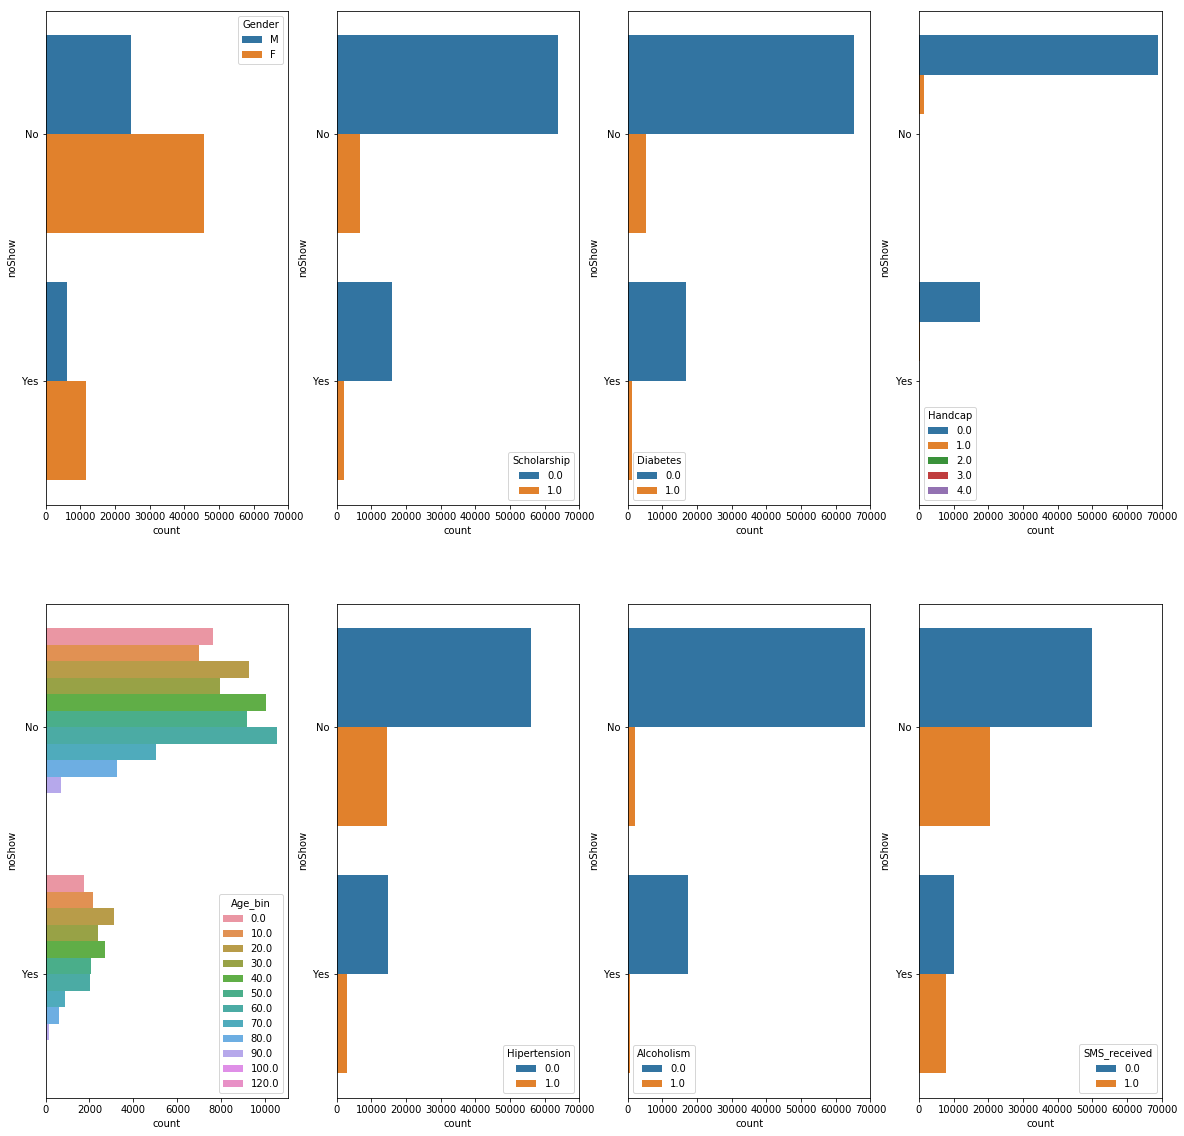

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
cols = 4
rows = 2
fig, axs = plt.subplots(figsize=(20,20),nrows=rows,ncols=cols)

#TODO: Adjust fontsize

for idx,feature in enumerate(['Gender','Age_bin','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']):
    idy,idx = divmod(idx,rows)    
    
    if feature !='Age_bin':
        axs[idx][idy].set_xlim(0,70000)
    sns.countplot(y="noShow", hue=feature, data=train_set,ax=axs[idx][idy])

In [ ]:
# TODO: Plot by Neighboorhood but select the top instances

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [ ]:
#EXTRACTED FROM EXAMPLE  ### NEEDS TO BE DEBUGGED

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder

cat_attributes = ['Gender','Neighbourhood']
num_attributes = ['Age']
#[x for x in list(housing) if x not in cat_attributes]

#TODO (What about dates?)

# This is used to select columns from a pandas DataFrame 
# Needed since sklearn does not have builtin support for pandas
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_encoder', LabelEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
   ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [ ]:
medicaldata = full_pipeline.fit_transform(train_set)